# kNN & Clustering

__Суммарное количество баллов: 10__

## kNN и рак (3 балла)

В этом части домашнего задания Вам предлагается при помощи классификации методом k ближайших соседей научиться отличать тип опухоли в организме

In [1]:
import copy
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.neighbors import KDTree

### 1. Данные (0.5 балла)


Реализуйте метод `read_cancer_dataset` . Он принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`.

In [2]:
CANCER_DATA_PATH = "data/cancer.csv"

In [3]:
pd.read_csv(CANCER_DATA_PATH)

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
def read_cancer_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    
    df = pd.read_csv(path_to_csv)
    
    return df.drop(columns="label"), df["label"]

In [5]:
X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)

In [6]:
X_cancer

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y_cancer.head()

0    M
1    M
2    M
3    M
4    M
Name: label, dtype: object

In [8]:
y_cancer.value_counts()

B    357
M    212
Name: label, dtype: int64

Начиная работать с данными, нам необходимо их предобработать и подготовить. В частности, нам необходимо разделить выборку на две: тренировочную и тестовую. Тренировочная выборка необходима для обучения алгоритма, а тестовая для проверки результатов обучения. Обычно используют коэффициент разделения `0.7`.

In [9]:
def train_test_split(X, y, ratio):
    # Возвращает X_train, y_train, X_test, y_test
    # X_train и X_test - массив векторов - две части массива X, разделенного в состветсви с коэффициентом ratio
    # y_train и y_test - соответствующие X_train и X_test метки классов
    
    n_samples = X.shape[0]
    train_size = int(ratio * n_samples)
    
    random_indexes = np.random.choice(X.index, size=train_size, replace=False)
    
    X_train = X.loc[random_indexes]
    y_train = y.loc[random_indexes]
    
    X_test = X.loc[~X.index.isin(random_indexes)]
    y_test = y.loc[~y.index.isin(random_indexes)]
    
    return X_train, y_train, X_test, y_test

### 2. Метрики (0.5 балла)

Также прежде чем приступать к решению задачи, нам необходимо определиться с метриками, которые позволят нам оценить полученное решение. Для задач классификации мы можем использовать precision, recall и accuracy. Эти метрики считаются для каждого класса. 

__Precision__ отражает то, насколько редко мы ошибаемся, когда говорим, что объект принадлежит к классу. 

__Recall__ же отражает то, насколько редко классификатор неправильно классифицирует объекты данного класса.

__Accuracy__ отражает то, какую часть выборки классификатор отнес к правильному классу.

In [10]:
def get_precision_recall_accuracy(y_pred, y_true):
    # Возвращает precision, recall и accuracy
    # precision - набор значений метрики precision для каждого класса
    # recall - набор значений метрики recall для каждого класса
    # accuracy - число, отражающее общую точность предсказания

    # Keys are classes, values are statistics
    precisions, recalls = {}, {}
    n = len(y_true)
    
    for class_label in y_true.unique():
        true_positive = np.sum((y_pred == class_label) & (y_true == class_label))
        false_negative = np.sum((y_pred != class_label) & (y_true == class_label))
        false_positive = np.sum((y_pred == class_label) & (y_true != class_label))
        
        precisions[class_label] = np.round(true_positive / (true_positive + false_positive), 2)
        recalls[class_label] = np.round(true_positive / (true_positive + false_negative), 2)
        
    accuracy = np.mean(y_pred == y_true)
        
    return precisions, recalls, accuracy

Теперь, имея этот метод, мы можем построить кривые зависимости Precision, Recall и Accuracy от параметра `k`

In [11]:
def plot_precision_recall(X_train, y_train, X_test, y_test, max_k=30):
    ks = list(range(1, max_k + 1))
    classes = len(np.unique(list(y_train) + list(y_test)))
    precisions = [[] for _ in range(classes)]
    recalls = [[] for _ in range(classes)]
    accuracies = []
    
    for k in ks:
        classifier = KNearest(k)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        precision, recall, acc = get_precision_recall_accuracy(y_pred, y_test)
        
        for c in range(classes):
            precisions[c].append(precision[c])
            recalls[c].append(recall[c])
            
        accuracies.append(acc)
        
    def plot(x, ys, ylabel, legend=True):        
        plt.figure(figsize = (12, 3))
        plt.xlabel("K")
        plt.ylabel(ylabel)
        plt.xlim(x[0], x[-1])
        plt.ylim(np.min(ys)-0.01, np.max(ys)+0.01)
        
        for cls, cls_y in enumerate(ys):
            plt.plot(x, cls_y, label="Class " + str(cls))
            
        if legend:
            plt.legend()
            
        plt.tight_layout()
        plt.show()
    
    plot(ks, recalls, "Recall")
    plot(ks, precisions, "Precision")
    plot(ks, [accuracies], "Accuracy", legend=False)

Также для оценки качества классификации построим __ROC-кривую__. Она отражает зависимость __True Positive Rate__ (TPR) от __False Positive Rate__ (FPR) для заранее фиксированного класса. Чем график выше побочной диагонали - тем лучше.

In [12]:
def plot_roc_curve(X_train, y_train, X_test, y_test, max_k=30):
    positive_samples = sum(1 for y in y_test if y == 0)
    ks = list(range(1, max_k + 1))
    curves_tpr = []
    curves_fpr = []
    colors = []
    
    for k in ks:
        colors.append([k / ks[-1], 0, 1 - k / ks[-1]])
        knearest = KNearest(k)
        knearest.fit(X_train, y_train)
        p_pred = [p[0] for p in knearest.predict_proba(X_test)]
        tpr = []
        fpr = []
        for w in np.arange(-0.01, 1.02, 0.01):
            y_pred = [(0 if p > w else 1) for p in p_pred]
            tpr.append(sum(1 for yp, yt in zip(y_pred, y_test) if yp == 0 and yt == 0) / positive_samples)
            fpr.append(sum(1 for yp, yt in zip(y_pred, y_test) if yp == 0 and yt != 0) / (len(y_test) - positive_samples))
        curves_tpr.append(tpr)
        curves_fpr.append(fpr)
    plt.figure(figsize = (7, 7))
    
    for tpr, fpr, c in zip(curves_tpr, curves_fpr, colors):
        plt.plot(fpr, tpr, color=c)
        
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.tight_layout()
    plt.show()

## 3. KNN (2 балла)
Осталось реализовать сам классификатор. Реализуйте его, используя KD-дерево. (При желании можно воспользоваться библиотечной реализацией дерева)

Метод `__init__` принимает на вход количество соседей, по которым предсказывается класс, и размер листьев KD-дерева.

Метод `fit` должен по набору данных и меток "обучать" классификатор. 

Метод `predict_proba` должен предсказывать вероятности классов для заданного набора данных основываясь на классах соседей

In [13]:
class KNearest:
    def __init__(self, n_neighbors=5, leaf_size=30):
        self.n_neighbors = n_neighbors
        self.leaf_size = leaf_size
        
        self.kdtree = None
        self.X = None
        self.y = None
        self.classes = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.kdtree = KDTree(X, leaf_size=self.leaf_size)
        self.classes = np.arange(len(y.unique()))
        
    def predict_proba(self, X):
        # Возвращает матрицу, в которой строки соответствуют элементам X, а столбцы - классам. На пересечении строки и столбца должна быть указана вероятность того, что элемент относится к классу
        # Вероятность рассчитывается как количество ближайших соседей с данным классом деленное на общее количество соседей
        prob_matrix = np.zeros(shape=(X.shape[0], len(self.classes)))
        
        for i in range(X.shape[0]):
            row = X.iloc[i].to_numpy().reshape(1, -1)
            _, nearest_neighbors_idxs = self.kdtree.query(row, k=self.n_neighbors)
            
            nearest_neighbors_classes = np.array([self.y.iloc[idx] for idx in nearest_neighbors_idxs.flatten()])
            
            for j in range(len(self.classes)):
                prob_matrix[i, j] = np.mean(nearest_neighbors_classes == self.classes[j])
                
        return prob_matrix
        
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

Код, написанный преподавателями предполагает, что классы названы 0 и 1. Переименуем их, чтобы не вызвать ошибку

In [14]:
y_cancer = (y_cancer == "B").astype(int)
y_cancer

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

Наконец, протестируем наш классификатор на датасете _cancer_

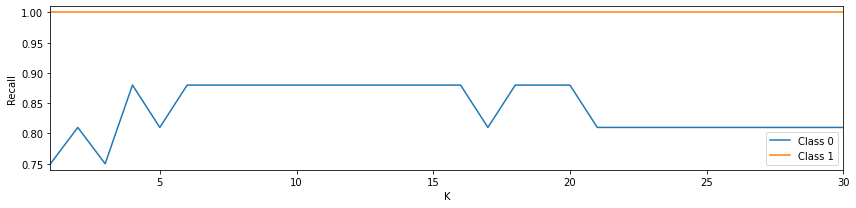

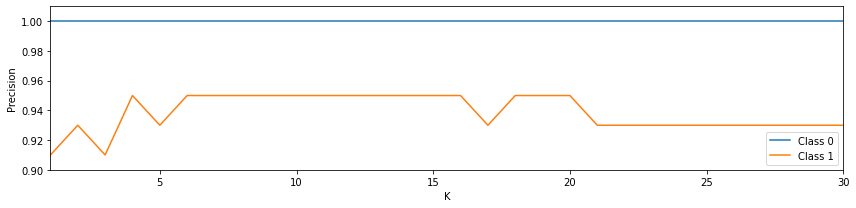

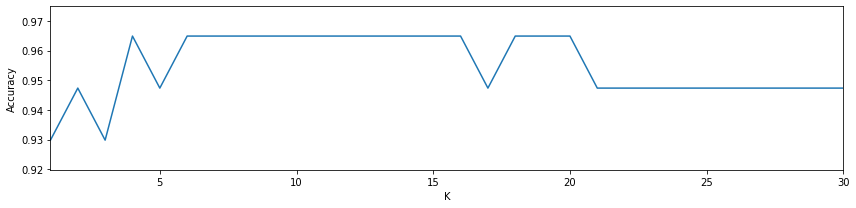

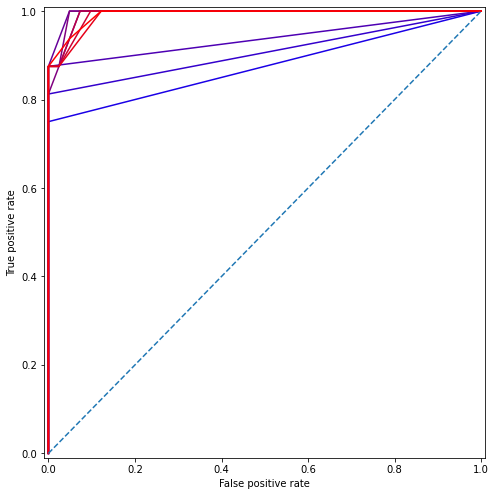

In [15]:
X_train, y_train, X_test, y_test = train_test_split(X_cancer, y_cancer, 0.9)
plot_precision_recall(X_train, y_train, X_test, y_test)
plot_roc_curve(X_train, y_train, X_test, y_test, max_k=10)



Проанализируйте полученные графики. Какой параметр `k` кажется лучшим? Какая из метрик лучше всего отражает качество модели? 

_Наилучшим кажется значение `k=4`: это минимальное значение, при котором Precision и Recall для каждого класса максимальны. "Лучшей" метрики не бывает: нужно отталкиваться от задачи. Здесь, в абстрактной задаче, можно было бы отталкиваться от площади под ROC_

## Clustering (7 баллов)

В этой части домашнего задания предлагается реализовать три различных метода кластеризации, понять, в каких случаях стоит применять те или иные методы.

In [16]:
from collections import deque
import copy
import random

from sklearn.neighbors import KDTree
from sklearn.datasets import make_blobs, make_moons, make_swiss_roll
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [17]:
def visualize_clusters(X, labels):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(9, 9))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()

def clusters_statistics(flatten_image, cluster_colors, cluster_labels):
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))
    for remove_color in range(3):
        axes_pair = axes[remove_color]
        first_color = 0 if remove_color != 0 else 2
        second_color = 1 if remove_color != 1 else 2
        axes_pair[0].scatter([p[first_color] for p in flatten_image], [p[second_color] for p in flatten_image], c=flatten_image, marker='.')
        axes_pair[1].scatter([p[first_color] for p in flatten_image], [p[second_color] for p in flatten_image], c=[cluster_colors[c] for c in cluster_labels], marker='.')
        for a in axes_pair:
            a.set_xlim(0, 1)
            a.set_ylim(0, 1)
    plt.show()

Генерируем два синтетических набора данных для кластеризации. Далее будем тестировать наши алгоритмы на них.

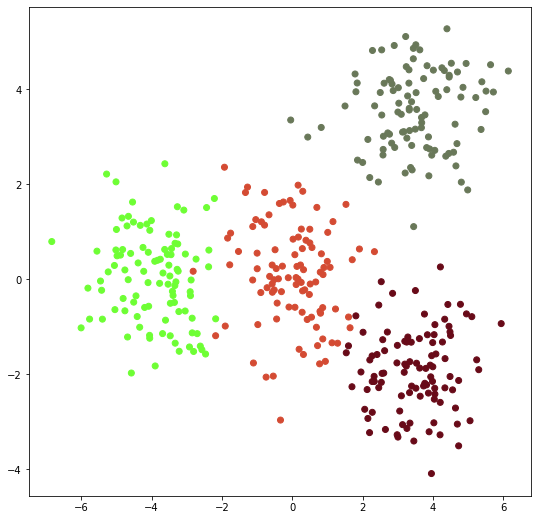

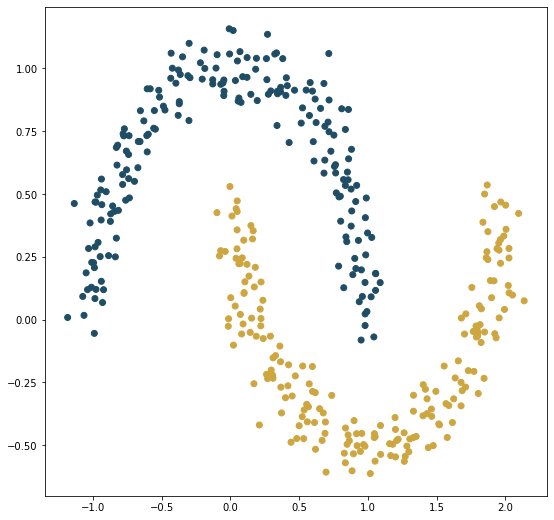

In [18]:
X_1, true_labels = make_blobs(400, 2, centers=[[0, 0], [-4, 0], [3.5, 3.5], [3.5, -2.0]])
visualize_clusters(X_1, true_labels)
X_2, true_labels = make_moons(400, noise=0.075)
visualize_clusters(X_2, true_labels)

### 1. K-means (2.5 балла)

Первый метод, который предлагается реализовать - метод K средних.

__Описание методов__

`fit(X, y=None)` ищет и запоминает в `self.centroids` центроиды кластеров для набора данных.
`predict(X)` для каждого элемента из `X` возвращает номер кластера, к которому относится данный элемент.

__Инициализация кластеров__

Есть несколько вариантов инициализации кластеров. Нужно реализовать их все:
1. `random` - центроиды кластеров являются случайными точками
2. `sample` - центроиды кластеров выбираются случайно из набора данных
3. `k-means++` - центроиды кластеров инициализируются при помощи метода K-means++


In [19]:
class KMeans:
    def __init__(self, n_clusters, init="random", max_iter=300):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        
        self.centroids = None
        self.X = None
        self.y = None
        self.n_samples = None
        self.n_features = None
        self.labels = None
        
        
    def _initialize_centroids(self):
        
        if self.init == "random":
            self.centroids = np.random.uniform(
                low=self.X.min(axis=0),
                high=self.X.max(axis=0),
                size=(self.n_clusters, self.n_features)
            )
            
        elif self.init == "sample":
            samples_indexes = np.random.choice(np.arange(self.n_samples), size=self.n_clusters, replace=False)
            self.centroids = self.X[samples_indexes]
            
        elif self.init == "k-means++":
            # Choose first cluster randomly among the data points
            random_idx = np.random.choice(np.arange(self.n_samples))
            random_point = self.X[random_idx]
            self.centroids = [random_point]
            
            while len(self.centroids) < self.n_clusters:
                distances_to_centroids = euclidean_distances(self.centroids, self.X).min(axis=0)
                probalilities = distances_to_centroids ** 2 / np.sum(distances_to_centroids ** 2)
                
                random_idx = np.random.choice(np.arange(self.n_samples), replace=False, p=probalilities)
                random_point = self.X[random_idx]
                self.centroids.append(random_point)
                
            self.centroids = np.array(self.centroids)
            
        else:
            raise ValueError(f"Initialization method {self.init} is not supported")
            
        
    def fit(self, X, y=None):
        self.X = X
        self.y = y   
        self.n_samples = self.X.shape[0]
        self.n_features = self.X.shape[1]
        
        self._initialize_centroids()
        
        n_iters = 0
        
        while n_iters < self.max_iter:
            self.labels = euclidean_distances(self.centroids, self.X).argmin(axis=0)
            
            new_centroids = []
            
            for i in range(self.n_clusters):
                cluster_points = self.X[self.labels == i]

                if cluster_points.shape[0] == 0:  # No points belong to the cluster
                    new_cluster_center = self.centroids[i]
                
                else:
                    new_cluster_center = np.mean(cluster_points, axis=0)
                    
                new_centroids.append(new_cluster_center)
                
            if np.sum(self.centroids - new_centroids) < 0.0001:  # Convergence
                break
            
            self.centroids = np.array(new_centroids)
            n_iters += 1
        
    
    def predict(self, X):
        # Return index of the closest centroid
        return euclidean_distances(self.centroids, X).argmin(axis=0)

Протестируйте алгоритм на синтетических данных. При необходимости подберите гиперпараметры для достижения лучшего качества кластеризации.

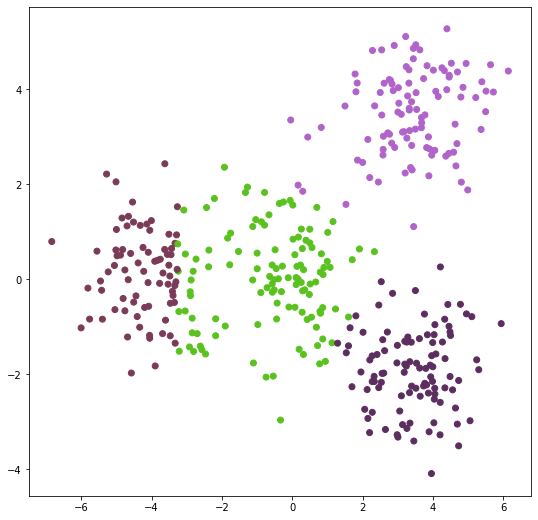

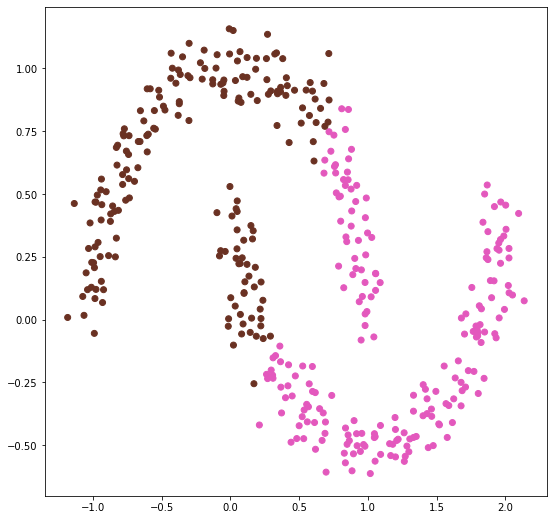

In [20]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(X_1)
labels_kmeans_1 = kmeans.predict(X_1)
visualize_clusters(X_1, labels_kmeans_1)

kmeans = KMeans(n_clusters=2, init="k-means++")
kmeans.fit(X_2)
labels_kmeans_2 = kmeans.predict(X_2)
visualize_clusters(X_2, labels_kmeans_2)

### 2. DBScan (3.5 балла)
В отличии от K-means, DBScan не позволяет задать количество кластеров, на которое будут разбиты данные. Руководствуясь геометрической интерпретацией, он позволяет выделять кластеры более сложной формы.

__Описание методов__

`fit_predict(X, y=None)` для каждого элемента `X` возвращает метку кластера, к которому он относится.

__Возможные метрики__

* `euclidean`
* `manhattan`
* `chebyshev`

__Для быстрого поиска соседей используйте `sklearn.neighbors.KDTree`__

In [21]:
class DBScan:
    def __init__(self, eps=0.5, min_samples=5, leaf_size=40, metric="euclidean"):
        self.eps = eps
        self.min_samples = min_samples
        self.leaf_size = leaf_size
        self.metric = metric
        
        self.labels = None
        self.visited_points = None
        self.n_samples = None
        self.kdtree = None
        self.X = None
        self.core_samples_idxs = []
        
        
    def _find_core_samples(self):
        for i in range(self.n_samples):
            point = self.X[i].reshape(1, -1)
            n_neighbors = self.kdtree.query_radius(point, r=self.eps, count_only=True)[0]

            if n_neighbors >= self.min_samples:
                self.core_samples_idxs.append(i)

                
    def fit_predict(self, X, y=None):
        self.X = X
        self.n_samples = X.shape[0]
        self.kdtree = KDTree(X, leaf_size=self.leaf_size, metric=self.metric)
        
        self._find_core_samples()
        self.labels = np.zeros(self.n_samples, dtype=int) - 1
        self.visited_points = np.zeros(self.n_samples)
        
        cluster = 0
        
        while not all(self.visited_points):
            
            if not self.core_samples_idxs:
                # All core samples are visited, so other points are outliers
                self.visited_points = np.ones(self.n_samples)
                break
            
            queue = deque()
            queue.appendleft(self.core_samples_idxs.pop())
            
            while queue:
                cluster_point_idx = queue.pop()
                
                if not self.visited_points[cluster_point_idx]:
                    self.visited_points[cluster_point_idx] = 1
                    self.labels[cluster_point_idx] = cluster
                    
                    point = self.X[cluster_point_idx].reshape(1, -1)
                    neighbors = self.kdtree.query_radius(point, r=self.eps)[0]
                    
                    for neighbor_idx in neighbors:
                        if neighbor_idx in self.core_samples_idxs:
                            # Unefficient, better to optimize!
                            self.core_samples_idxs.remove(neighbor_idx)
                        
                        if not self.visited_points[neighbor_idx]:
                            queue.appendleft(neighbor_idx)
            
            cluster += 1
            
        return self.labels

Протестируйте алгоритм на синтетических данных. При необходимости подберите гиперпараметры для достижения лучшего качества кластеризации.

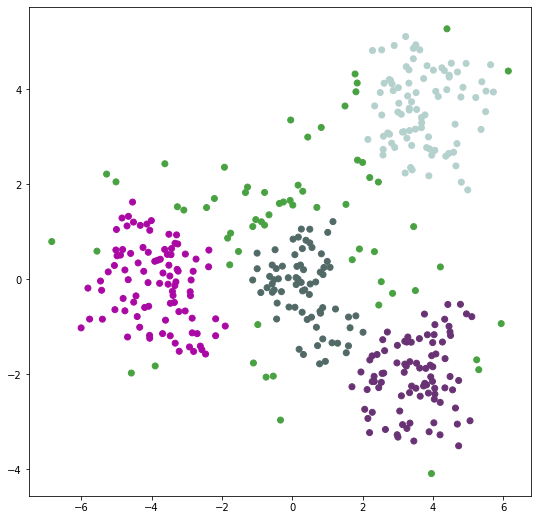

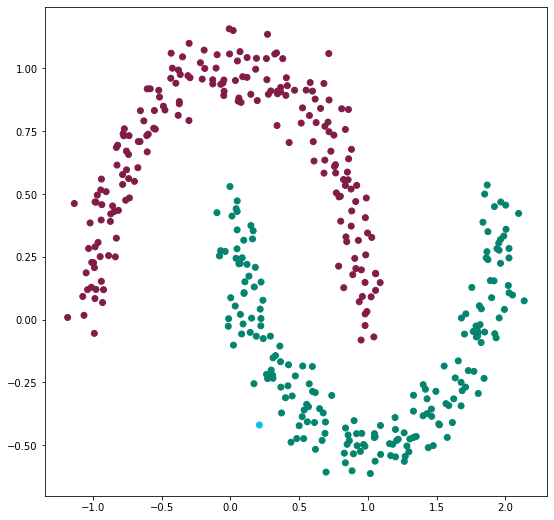

In [29]:
dbscan = DBScan(eps=0.5, min_samples=10)
labels_dbscan_1 = dbscan.fit_predict(X_1)
visualize_clusters(X_1, labels_dbscan_1)

dbscan = DBScan(eps=0.15)
labels_dbscan_2 = dbscan.fit_predict(X_2)
visualize_clusters(X_2, labels_dbscan_2)

### 3. Оценка качества моделей (1 балл)
Проанализируйте полученные результаты. 

Какой метод лучше справился с кластеризацией? Почему? 

Сравните значения метрик  `Davies-Bouldin index` и `Silhouette score` для определения качества кластеризации. 

Какие значения метрики свидетельствуют о хорошей кластеризации - большие или маленькие?

_Для silhouette score значения, близкие к единице, свидетельсвуют о "хорошей" кластеризации, а к 0 или -1 – о плохом качестве. Для Davies-Bouldin index меньшие значения свидетельствуют о лучшей кластеризации_

In [23]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [31]:
print("K-means Davies-Bouldin score on dataset 1:\t", round(davies_bouldin_score(X_1, labels_kmeans_1), 2))
print("DBSCAN Davies-Bouldin score on dataset 1:\t", round(davies_bouldin_score(X_1, labels_dbscan_1), 2))

print("K-means silhouette score on dataset 1:\t", round(silhouette_score(X_1, labels_kmeans_1), 2))
print("DBSCAN silhouette score on dataset 1:\t", round(silhouette_score(X_1, labels_dbscan_1), 2))

print("K-means Davies-Bouldin score on dataset 2:\t", round(davies_bouldin_score(X_2, labels_kmeans_2), 2))
print("DBSCAN Davies-Bouldin score on dataset 2:\t", round(davies_bouldin_score(X_2, labels_dbscan_2), 2))

print("K-means silhouette score on dataset 2:\t", round(silhouette_score(X_2, labels_kmeans_2), 2))
print("DBSCAN silhouette score on dataset 2:\t", round(silhouette_score(X_2, labels_dbscan_2), 2))

K-means Davies-Bouldin score on dataset 1:	 0.64
DBSCAN Davies-Bouldin score on dataset 1:	 1.72
K-means silhouette score on dataset 1:	 0.52
DBSCAN silhouette score on dataset 1:	 0.46
K-means Davies-Bouldin score on dataset 2:	 0.79
DBSCAN Davies-Bouldin score on dataset 2:	 1.06
K-means silhouette score on dataset 2:	 0.48
DBSCAN silhouette score on dataset 2:	 0.09


_По этим метрикам k-means как будто бы лучше справляется с кластеризацией на обоих датасетах. Хотя визуально кажется, что это не так. Вероятно, дело в том, что DBSCAN умеет выделять кластер с выбросами, который портит значения метрик_

_И действительно, при удалении образцов-выбросов, значения метрик становятся лучше, местами обгоняя k-means:_

In [35]:
outliers_1 = (labels_dbscan_1 == -1)
outliers_2 = (labels_dbscan_2 == -1)

print("DBSCAN Davies-Bouldin score on dataset 1:\t",
      round(davies_bouldin_score(X_1[~outliers_1], labels_dbscan_1[~outliers_1]), 2))

print("DBSCAN silhouette score on dataset 1:\t",
      round(silhouette_score(X_1[~outliers_1], labels_dbscan_1[~outliers_1]), 2))


print("DBSCAN Davies-Bouldin score on dataset 2:\t",
      round(davies_bouldin_score(X_2[~outliers_2], labels_dbscan_2[~outliers_2]), 2))


print("DBSCAN silhouette score on dataset 2:\t",
      round(silhouette_score(X_2[~outliers_2], labels_dbscan_2[~outliers_2]), 2))

DBSCAN Davies-Bouldin score on dataset 1:	 0.49
DBSCAN silhouette score on dataset 1:	 0.64
DBSCAN Davies-Bouldin score on dataset 2:	 1.16
DBSCAN silhouette score on dataset 2:	 0.33


_Любопытно, что на втором датасете DBSCAN, согласно метрикам, всё равно показывает себя хуже, хотя визуально очевидно, что это не так_